# ws 02 03

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN 

In [ ]:
pitch = 20
step =  1
N = 100
n_train = int(N * 0.7)   

def gen_data(x):
    return (x % pitch ) / pitch 


t = np.arange(1, N+1) 

y = [gen_data(i) for i in t]

y = np.array(y)

print(f' max: {np.max(y)}')
print(y[:15])

 max: 0.95
[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75]


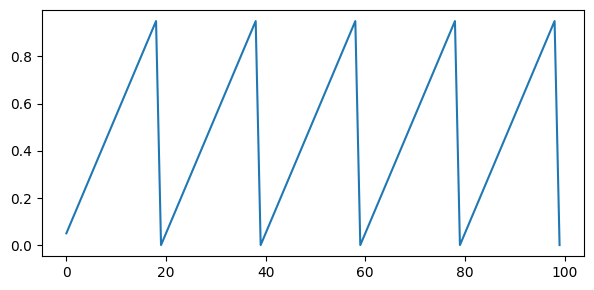

In [3]:
plt.figure(figsize=(7,3.2))
plt.plot(y)
plt.show()

In [4]:
# convert into dataset matrix
def convertToMatrix(data, step=1):  
    X, Y = [], []
    for i in range(len(data)-step):
        d = i + step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [5]:

train, test = y[0:n_train], y[n_train:N]

print('train test (before conversion):', train.shape, test.shape)
 
X_train, y_train = convertToMatrix(train, step) 
X_test, y_test = convertToMatrix(test, step)

print('train test (after conversion):', X_train.shape, X_test.shape)

train test (before conversion): (70,) (30,)
train test (after conversion): (69, 1) (29, 1)


In [6]:
print(X_train[:7])

[[0.05]
 [0.1 ]
 [0.15]
 [0.2 ]
 [0.25]
 [0.3 ]
 [0.35]]


In [7]:
print(y_train[:6])

[0.1  0.15 0.2  0.25 0.3  0.35]


In [8]:

X_train = np.expand_dims(X_train, -1) 
X_test = np.expand_dims(X_test, -1) 

X_train.shape, y_train.shape

((69, 1, 1), (69,))

In [9]:
X_train[:5]


array([[[0.05]],

       [[0.1 ]],

       [[0.15]],

       [[0.2 ]],

       [[0.25]]])

In [10]:
y_train[:10]

array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55])

In [11]:
y_train.shape

(69,)

## Model

In [12]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(step, 1), activation="relu"))

model.add(Dense(1))

model.compile(loss='mean_squared_error')
model.summary()

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

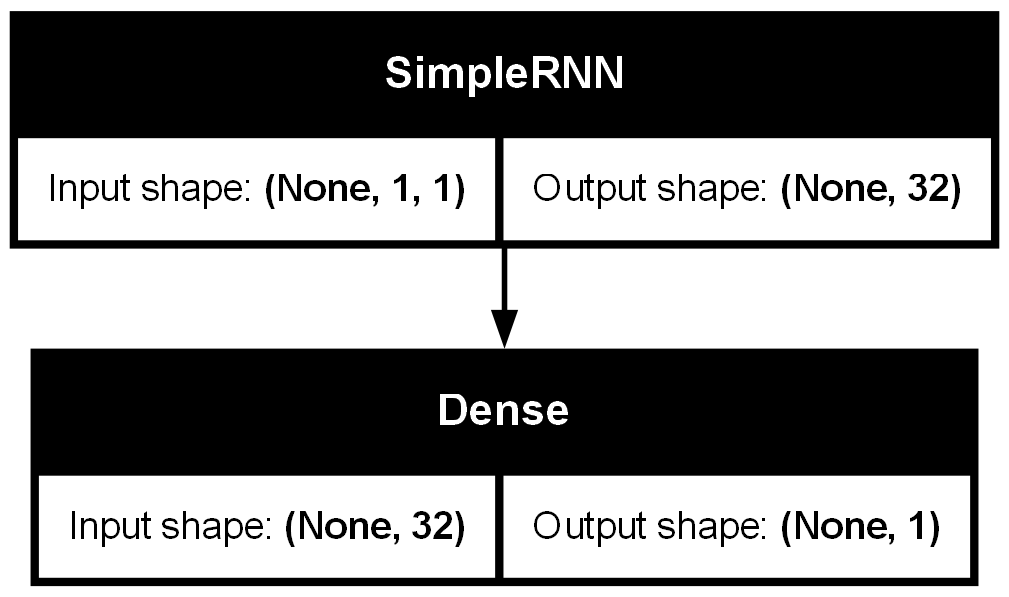

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'rnn2.png', show_shapes=True, show_layer_names=False)

In [14]:

history = model.fit(X_train, y_train, epochs=20+10, batch_size=1, verbose=0)

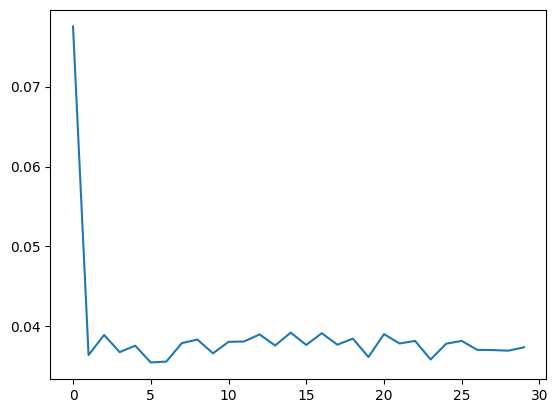

In [15]:
plt.plot(history.history['loss'])
plt.show()

## Eval

In [16]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
trainScore

0.03547639399766922

In [17]:
from sklearn.metrics import r2_score

In [18]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)

y_pred_train = np.squeeze(trainPredict)
print('Y train shape:', y_train.shape, y_pred_train.shape)

y_pred_test = np.squeeze(testPredict)
print('Y test shape:',y_test.shape, y_pred_test.shape)

r2_train = r2_score(y_train, y_pred_train)  
r2_test = r2_score(y_test, y_pred_test)

print('R2 Train: {:.3f}'. format(r2_train))
print('R2 Test: {:.3f}'. format(r2_test))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Y train shape: (69,) (69,)
Y test shape: (29,) (29,)
R2 Train: 0.545
R2 Test: 0.370


In [19]:
prefix = np.empty(step).reshape(-1, 1)
prefix.fill(np.nan)

trainPredict = np.concatenate((prefix, trainPredict), axis=0) 
testPredict = np.concatenate((prefix, testPredict), axis=0) 

predicted = np.concatenate((trainPredict,testPredict),axis=0)


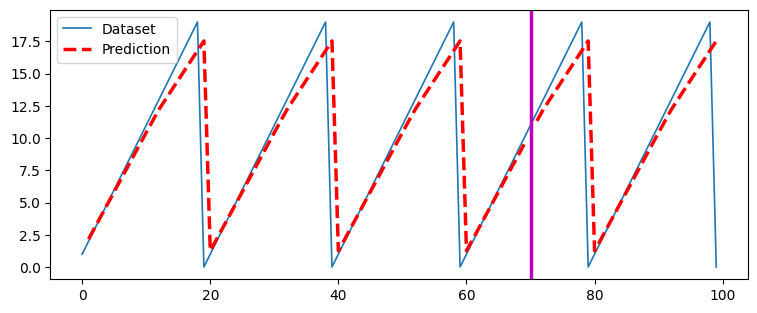

In [20]:

plt.figure(figsize=(9,3.5))

plt.plot(y * pitch , lw=1.2, label='Dataset')  # dataset
plt.plot(predicted * pitch , 'r--', lw=2.5, label='Prediction')
plt.axvline(n_train, c='m', lw=2.5)

plt.legend(loc=2)
plt.show()

In [21]:
new_x = 1
new_x = np.array(new_x).reshape(1, 1, 1)
pred = model.predict(new_x / pitch) 
prediction = pred * pitch
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.10826728]]


In [22]:
new_x/pitch

array([[[0.05]]])

In [23]:
X_test

array([[[0.55]],

       [[0.6 ]],

       [[0.65]],

       [[0.7 ]],

       [[0.75]],

       [[0.8 ]],

       [[0.85]],

       [[0.9 ]],

       [[0.95]],

       [[0.  ]],

       [[0.05]],

       [[0.1 ]],

       [[0.15]],

       [[0.2 ]],

       [[0.25]],

       [[0.3 ]],

       [[0.35]],

       [[0.4 ]],

       [[0.45]],

       [[0.5 ]],

       [[0.55]],

       [[0.6 ]],

       [[0.65]],

       [[0.7 ]],

       [[0.75]],

       [[0.8 ]],

       [[0.85]],

       [[0.9 ]],

       [[0.95]]])

In [24]:
y_test[:10] * pitch

array([12., 13., 14., 15., 16., 17., 18., 19.,  0.,  1.])

In [25]:
# pred = model.predict(X_train) * pitch
pred = model.predict(X_test) * pitch
np.squeeze(pred)[:10].round(1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([11.3, 12.2, 13. , 13.7, 14.5, 15.3, 16. , 16.8, 17.5,  1.3],
      dtype=float32)

In [26]:
import numpy as np
Ct0 = np.array([[2],[3]])
Wt0 = np.array([[0],[0.5]])
Ct = Ct0*Wt0
print(Ct)

[[0. ]
 [1.5]]


In [27]:
It = np.array([[0],[.2]])
Ct = Ct + It
print(Ct)

[[0. ]
 [1.7]]
